In [1]:
import numpy as np
import matplotlib.pyplot as plt

def process_bin(directory, file, num_bytes=-1):
    # Lendo 18 elementos np.int16 (36 bytes totais)
    # Isso resulta em 9 amostras complexas (I/Q)
    gps_raw = np.fromfile(directory + file, dtype=np.int16, count=num_bytes)
    print("Loaded signal with shape " + str(gps_raw.shape))
    
    # Conversão para complexo
    gps_complex = gps_raw.astype(np.float32).view(np.complex64)
    
    print(f"Number of complex samples (I/Q): {gps_complex.shape[0]}")
    
    I_samples = gps_complex.real
    Q_samples = gps_complex.imag
    
    # O eixo X é o índice da amostra
    time = np.arange(len(gps_complex)) 

    plt.figure(figsize=(10, 5))
    
    # Plotar o componente I (parte real)
    plt.plot(time, I_samples, label='Componente I (In-phase)', marker='o', linestyle='-', color='blue')
    
    # Plotar o componente Q (parte imaginária)
    plt.plot(time, Q_samples, label='Componente Q (Quadrature)', marker='x', linestyle='--', color='red')
    
    plt.title(f'Sinal GPS I/Q ao Longo do Tempo (Primeiras Amostras do {file})')
    plt.xlabel('Índice da Amostra (Tempo)')
    plt.ylabel('Amplitude do Sinal (Unidade de 16-bit)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Salvamento 
    np.save(file[0:-4] + "_complex.npy", gps_complex)
    print("Processing for file " + file + " complete.")

Loaded signal with shape (120,)
Number of complex samples (I/Q): 60


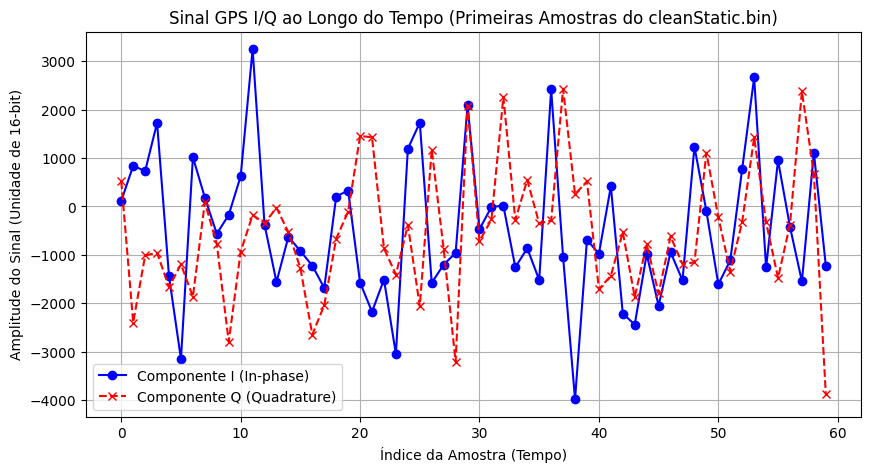

Processing for file cleanStatic.bin complete.


In [2]:
process_bin("D:\\TEXBAT\\", "cleanStatic.bin", 120)

Loaded signal with shape (120,)
Number of complex samples (I/Q): 60


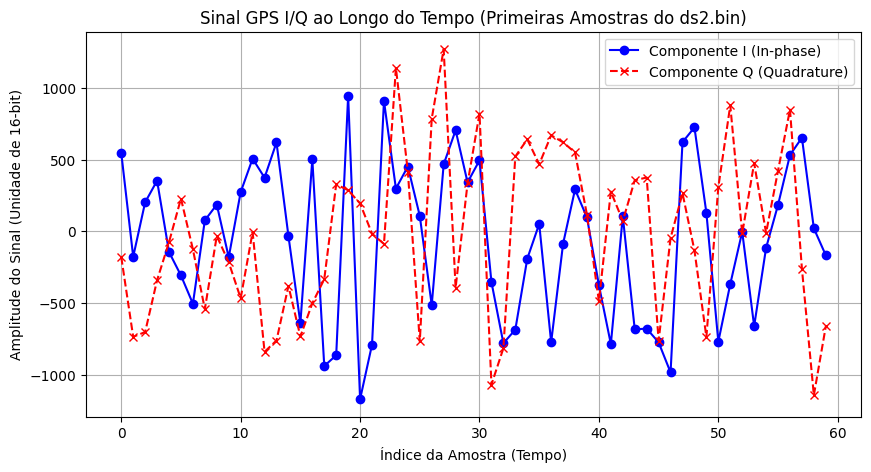

Processing for file ds2.bin complete.


In [3]:
process_bin("D:\\TEXBAT\\", "ds2.bin", 120)